In [30]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os 
import glob
from scipy import misc
import json
dir_path = os.getcwd()
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from pprint import pprint
labelValues = json.load(open('class_maps.json'))
labelValues

{'Atelectasis': 'class_7',
 'Cardiomegaly': 'class_2',
 'Consolidation': 'class_11',
 'Edema': 'class_8',
 'Effusion': 'class_5',
 'Emphysema': 'class_14',
 'Fibrosis': 'class_1',
 'Hernia': 'class_9',
 'Infiltration': 'class_3',
 'Mass': 'class_4',
 'Nodule': 'class_12',
 'Pleural_Thickening': 'class_13',
 'Pneumonia': 'class_10',
 'Pneumothorax': 'class_6'}

In [39]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

for filename in os.listdir(inputPath):
    infilename = os.path.join(inputPath,filename)
    if not os.path.isfile(infilename): continue
    oldbase = os.path.splitext(filename)
    newname = infilename.replace('.png', '.jpeg')
    output = os.rename(infilename, newname)

In [43]:
def grayscale(image_name, imageLoc):
    im = misc.imread(os.path.join(imageLoc, image_name))
    return im

In [4]:
img_rows, img_cols = 1024, 1024
num_classes = 14
batch_size = 128
epochs = 10
image_dir = os.path.join(os.getcwd()+'/train_')

In [5]:
#call this during traing along with chunking
def resize(x_train, x_test):
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    return input_shape

In [6]:
trainLoc = os.path.join(os.getcwd()+'/train_resized')
testLoc = os.path.join(os.getcwd()+'/test_resized')


In [7]:
df = pd.read_csv("train.csv")
df.head()

,row_id,age,gender,view_position,image_name,detected
0,id_0,45,M,0,scan_0000.png,class_3
1,id_1,57,F,0,scan_0001.png,class_3
2,id_10,58,M,0,scan_00010.png,class_3
3,id_1000,64,M,0,scan_0001000.png,class_6
4,id_10000,33,M,1,scan_00010000.png,class_3


In [8]:
male1 = df.loc[(df['gender'] == "M") & df['view_position'] == 1]
male2 = df.loc[(df['gender'] == "M") & df['view_position'] == 2]
female1 = df.loc[(df['gender'] == "F") & df['view_position'] == 1]
female2 = df.loc[(df['gender'] == "F") & df['view_position'] == 2]

In [50]:
male1Train = male1.drop(columns=['detected','row_id']).values
male1Test = male1['detected'].values
male2Train = male2.drop(columns=['detected','row_id']).values
male2Test = male2['detected'].values
female1Train = female1.drop(columns=['detected','row_id']).values
female1Test = female1['detected'].values
female2Train = female1.drop(columns=['detected','row_id']).values
female2Test = female1['detected'].values

33


/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


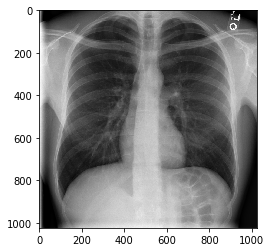

In [66]:
k = list(chunks(male1Train, 100))
for (_) in k:
    for (a) in _:
        img = grayscale(a[3], image_dir)
        print(a[0])
        break
    break
imgplot = plt.imshow(img, "gray")

In [67]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(32, (5, 5), activation='relu'))
model1.add(Conv2D(16, (7, 7), activation='relu'))
model1.add(Conv2D(16, (11, 11), activation='relu'))
model1.add(Conv2D(16, (21, 21), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))




NameError: name 'input_shape' is not defined

In [64]:
def input_function(x_train, y_train, batchsize, epochs, x_test, y_test):
    x = list(chunks(x_train, batchsize))
    y = list(chunks(y_train, batchsize))
    l = []
    m = []
    model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    for (_) in y:
        for (a) in _:
            m.append(_)
    for (_) in x:
        for (a) in _:
            img = grayscale(a[3], image_dir)
            l.append(img)
        pprint(len(l))
        print("this is where the model is fitted")
        model1.fit(l, m,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)

In [65]:
input_function(male1Train, 100)

/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


100
this is where the model is fitted


In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(32, (5, 5), activation='relu'))
model2.add(Conv2D(16, (7, 7), activation='relu'))
model2.add(Conv2D(16, (11, 11), activation='relu'))
model2.add(Conv2D(16, (21, 21), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))


In [ ]:
model3 = Sequential()
model3.dd(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(32, (5, 5), activation='relu'))
model3.add(Conv2D(16, (7, 7), activation='relu'))
model3.add(Conv2D(16, (11, 11), activation='relu'))
model3.add(Conv2D(16, (21, 21), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))


In [3]:
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Conv2D(32, (5, 5), activation='relu'))
model4.add(Conv2D(16, (7, 7), activation='relu'))
model4.add(Conv2D(16, (11, 11), activation='relu'))
model4.add(Conv2D(16, (21, 21), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))


NameError: name 'input_shape' is not defined